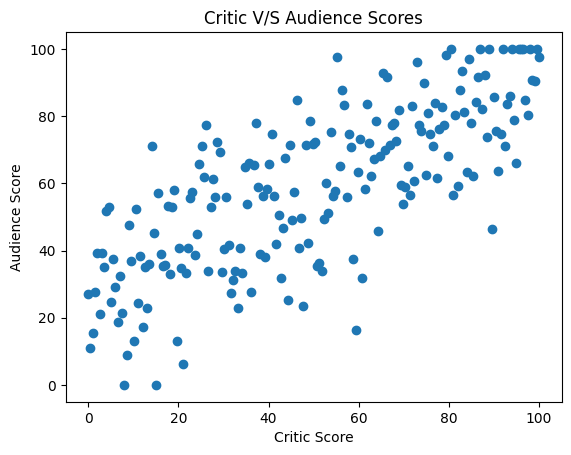

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('MovieData.csv')

# Plot the data
plt.scatter(data['Critic Score'], data['Audience Score'])
plt.xlabel('Critic Score')
plt.ylabel('Audience Score')
plt.title('Critic V/S Audience Scores')
plt.show()

In [2]:
def MSE(t_target, y_predicted):
    mse = np.mean((t_target - y_predicted) ** 2)
    return mse

In [87]:
def GradDescent(t_target, x_input, l_learning_rate):
    # Initialize weights
    num_iterations=200000
    w = np.zeros(x_input.shape[1])
    N = len(t_target)
    
    for _ in range(num_iterations):
        y_predicted = np.dot(x_input, w)
        error = y_predicted - t_target
        gradient = np.dot(x_input.T, error) / N
        w -= l_learning_rate * gradient
        
    return w

In [4]:
def LinRegression(X, t):
    X_T = X.T
    w = np.linalg.inv(X_T @ X) @ X_T @ t
    return w

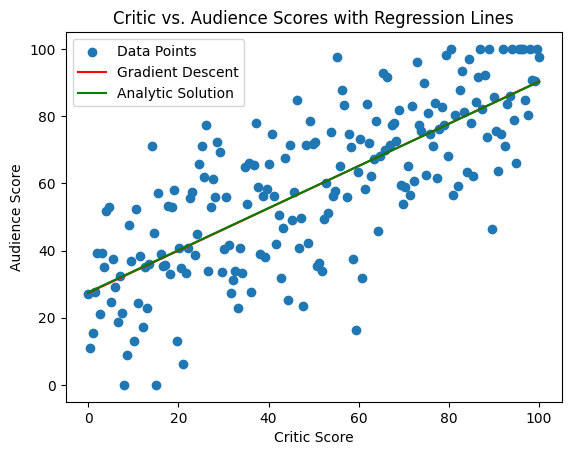

In [88]:
# Add a column of ones to X for the bias term
X = np.c_[np.ones(data.shape[0]), data['Critic Score']]
t = data['Audience Score']

# Compute weights using gradient descent
w_gd = GradDescent(t, X, l_learning_rate=0.0001)

# Compute weights using the analytic solution
w_lr = LinRegression(X, t)

# Plot the data
plt.scatter(data['Critic Score'], data['Audience Score'], label='Data Points')
plt.plot(data['Critic Score'], np.dot(X, w_gd), color='red', label='Gradient Descent')
plt.plot(data['Critic Score'], np.dot(X, w_lr), color='green', label='Analytic Solution')
plt.xlabel('Critic Score')
plt.ylabel('Audience Score')
plt.title('Critic vs. Audience Scores with Regression Lines')
plt.legend()
plt.show()

In [6]:
# Split the data
np.random.seed(42)
indices = np.random.permutation(data.shape[0])
train_indices = indices[:int(0.8 * data.shape[0])]
test_indices = indices[int(0.8 * data.shape[0]):]

X_train, X_test = X[train_indices], X[test_indices]
t_train, t_test = t[train_indices], t[test_indices]

# Train the model using the analytic solution
w_train = LinRegression(X_train, t_train)

# Predict on the test set
y_pred = np.dot(X_test, w_train)

# Compute MSE
mse = MSE(t_test, y_pred)
print(f'MSE on Test Set: {mse}')

MSE on Test Set: 327.24647512887566


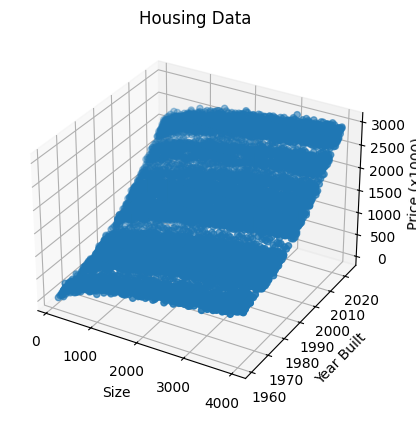

In [7]:
# Read the data
housing_data = pd.read_csv('3DHousingData.csv')

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(housing_data['# Square Foot'], housing_data['Year Built'], housing_data['Price'])
ax.set_xlabel('Size')
ax.set_ylabel('Year Built')
ax.set_zlabel('Price (x1000)')
plt.title('Housing Data')
plt.show()

In [8]:
# Prepare the data
X_housing = np.c_[np.ones(housing_data.shape[0]), housing_data['# Square Foot'], housing_data['Year Built']]
t_housing = housing_data['Price']

# Compute weights using the analytic solution
w_housing = LinRegression(X_housing, t_housing)
print(f'Model Parameters: {w_housing}')

Model Parameters: [-6.48351293e+04  1.93545083e-01  3.30124470e+01]


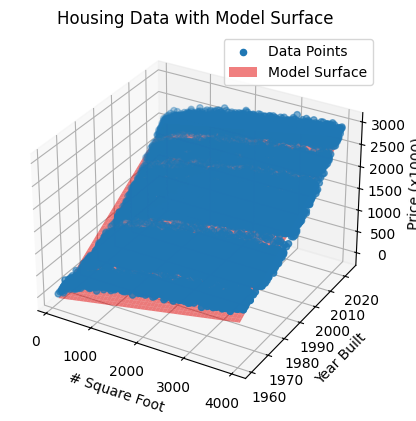

In [9]:
# Create a meshgrid for the surface plot
size_range = np.linspace(housing_data['# Square Foot'].min(), housing_data['# Square Foot'].max(), 100)
year_range = np.linspace(housing_data['Year Built'].min(), housing_data['Year Built'].max(), 100)
size_grid, year_grid = np.meshgrid(size_range, year_range)
price_grid = w_housing[0] + w_housing[1] * size_grid + w_housing[2] * year_grid

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(housing_data['# Square Foot'], housing_data['Year Built'], housing_data['Price'], label='Data Points')
ax.plot_surface(size_grid, year_grid, price_grid, color='red', alpha=0.5, label='Model Surface')
ax.set_xlabel('# Square Foot')
ax.set_ylabel('Year Built')
ax.set_zlabel('Price (x1000)')
plt.title('Housing Data with Model Surface')
plt.legend()
plt.show()

In [10]:
# Prepare the data for the complex model
X_complex = np.c_[np.ones(housing_data.shape[0]), np.sqrt(housing_data['# Square Foot'] - 100), (housing_data['Year Built'] - 1960) ** 2]
t_complex = housing_data['Price']

# Compute weights using the analytic solution
w_complex = LinRegression(X_complex, t_complex)
print(f'Complex Model Parameters: {w_complex}')

Complex Model Parameters: [15.92095597 14.96929758  0.4999236 ]


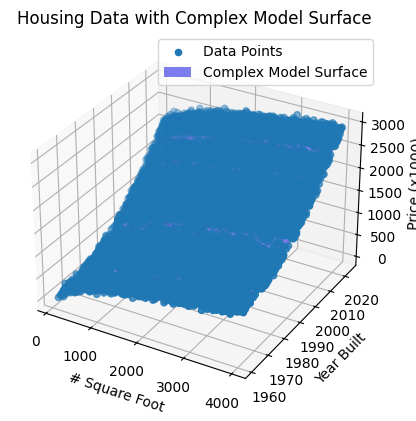

In [11]:
# Create a meshgrid for the surface plot
price_grid_complex = w_complex[0] + w_complex[1] * np.sqrt(size_grid - 100) + w_complex[2] * (year_grid - 1960) ** 2

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(housing_data['# Square Foot'], housing_data['Year Built'], housing_data['Price'], label='Data Points')
ax.plot_surface(size_grid, year_grid, price_grid_complex, color='blue', alpha=0.5, label='Complex Model Surface')
ax.set_xlabel('# Square Foot')
ax.set_ylabel('Year Built')
ax.set_zlabel('Price (x1000)')
plt.title('Housing Data with Complex Model Surface')
plt.legend()
plt.show()

In [12]:
# Predict using the linear model
y_pred_linear = np.dot(X_housing, w_housing)
mse_linear = MSE(t_housing, y_pred_linear)

# Predict using the complex model
y_pred_complex = np.dot(X_complex, w_complex)
mse_complex = MSE(t_complex, y_pred_complex)

print(f'MSE for Linear Model: {mse_linear}')
print(f'MSE for Complex Model: {mse_complex}')

MSE for Linear Model: 30171.898415985346
MSE for Complex Model: 2476.0808361781897
